In [1]:
### Imports ### 
import pandas as pd
import os
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from tmap.tda import mapper, Filter
from tmap.tda.cover import Cover
from tmap.tda.plot import Color, vis_progressX
from tmap.tda.metric import Metric
from tmap.tda.utils import optimize_dbscan_eps
from scipy.spatial.distance import squareform,pdist
from tmap.test import load_data
from tmap.netx.SAFE import SAFE_batch, get_SAFE_summary, get_significant_nodes

import plotly.graph_objs as go
from collections import Counter
pd.options.display.expand_frame_repr = False
pd.options.display.max_rows = 1000
import scipy.stats as scs
import warnings
import plotly
import plotly.express as px

In [2]:
### Data import and parsing ###
X = pd.read_csv("curat_otu_filtered.csv", index_col=0)

In [3]:
"""TDA ANALYSIS"""

# Converting vector-form distance to square-form distance matrix
dm = squareform(pdist(X,metric='braycurtis')) 

# Step 1: Initiate the Mapper algorithm
tm = mapper.Mapper(verbose=1)

# Step 2: Projection into low dimensional space
metric = Metric(metric="precomputed")
lens = [Filter.MDS(components=[0, 1], metric=metric, random_state=100)]
projected_X = tm.filter(dm, lens=lens)

# Step 3: Covering, clustering & mapping
eps = optimize_dbscan_eps(X, threshold=95)
clusterer = DBSCAN(eps=eps, min_samples=5)

Filtering by MDS.
...calculate Filter(which used to create cover) using the provided precomputed lens.
Filtering has been completed.


100%|██████████| 6400/6400 [00:01<00:00, 6150.62it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 1897 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 13971 edges.
Finish TDA mapping

Graph
Contains 1897 nodes and 2377 samples
During constructing graph, 678 (77.81%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 80
overlap: 0.8
lens params
lens_0:
components: [0, 1]
metric: precomputed




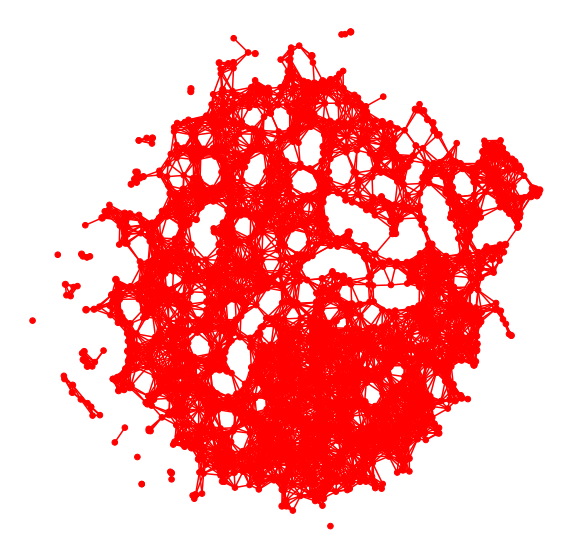

In [4]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=80, overlap=0.8)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 6400/6400 [00:01<00:00, 3587.73it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2198 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 19015 edges.
Finish TDA mapping

Graph
Contains 2198 nodes and 2449 samples
During constructing graph, 606 (80.16%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 80
overlap: 0.9
lens params
lens_0:
components: [0, 1]
metric: precomputed




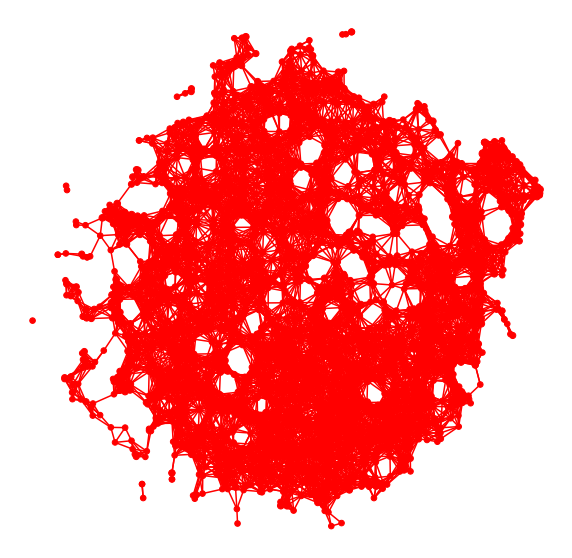

In [5]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=80, overlap=0.9)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 6400/6400 [00:01<00:00, 3502.04it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2440 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 23504 edges.
Finish TDA mapping

Graph
Contains 2440 nodes and 2481 samples
During constructing graph, 574 (81.21000000000001%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 80
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




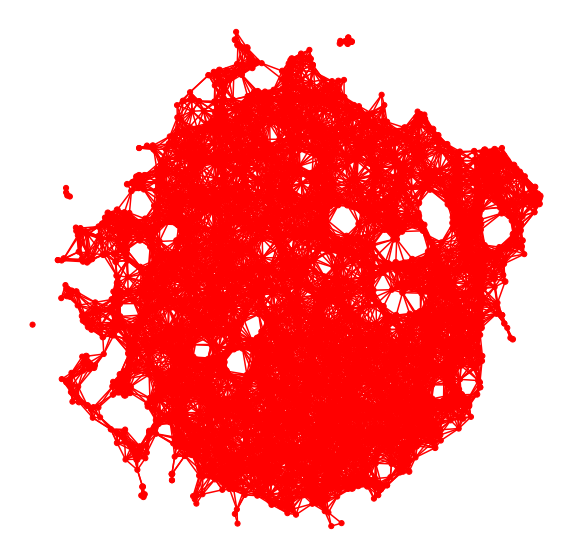

In [6]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=80, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 6400/6400 [00:01<00:00, 4635.64it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2624 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 34170 edges.
Finish TDA mapping

Graph
Contains 2624 nodes and 2520 samples
During constructing graph, 535 (82.49%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 80
overlap: 1.1
lens params
lens_0:
components: [0, 1]
metric: precomputed




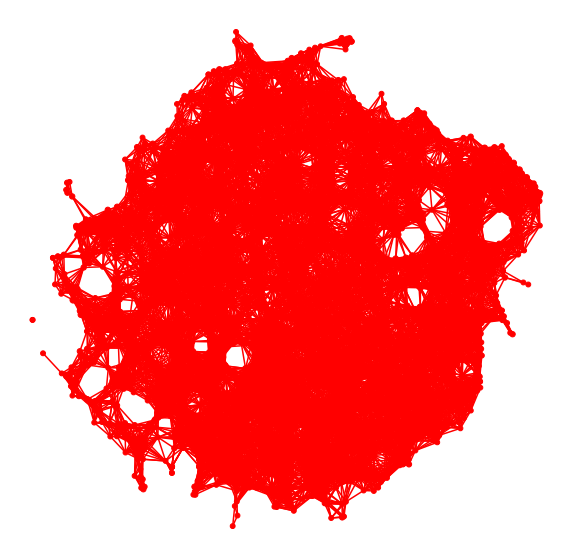

In [7]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=80, overlap=1.1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 6400/6400 [00:01<00:00, 4196.51it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2771 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 43872 edges.
Finish TDA mapping

Graph
Contains 2771 nodes and 2549 samples
During constructing graph, 506 (83.44%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 80
overlap: 1.2
lens params
lens_0:
components: [0, 1]
metric: precomputed




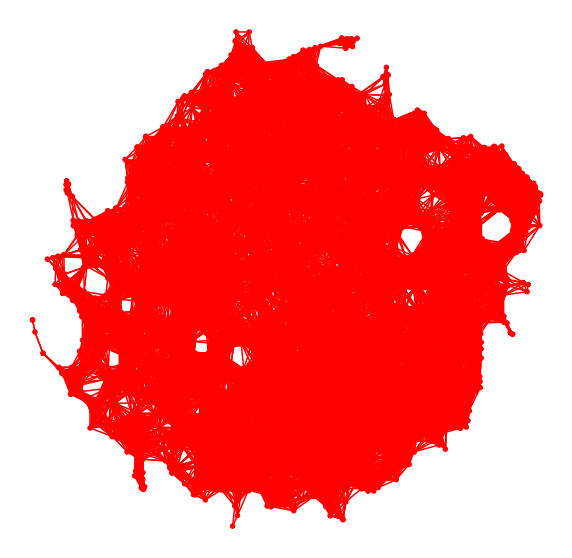

In [8]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=80, overlap=1.2)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 8100/8100 [00:01<00:00, 6194.06it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2486 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 21428 edges.
Finish TDA mapping

Graph
Contains 2486 nodes and 2412 samples
During constructing graph, 643 (78.95%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 90
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




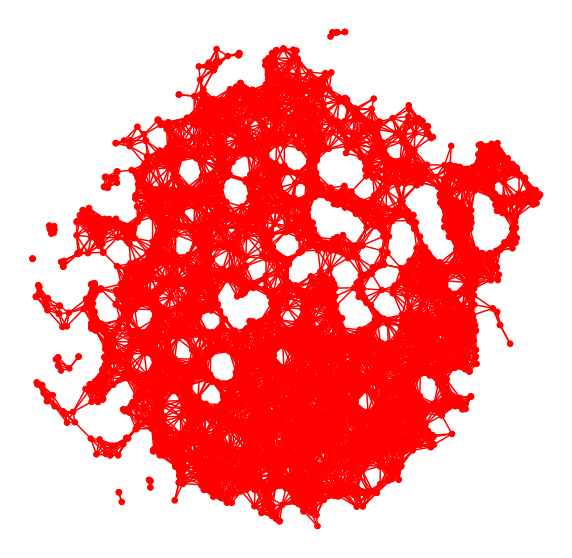

In [9]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=90, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 5625/5625 [00:01<00:00, 4309.36it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2306 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 23113 edges.
Finish TDA mapping

Graph
Contains 2306 nodes and 2512 samples
During constructing graph, 543 (82.23%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 75
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




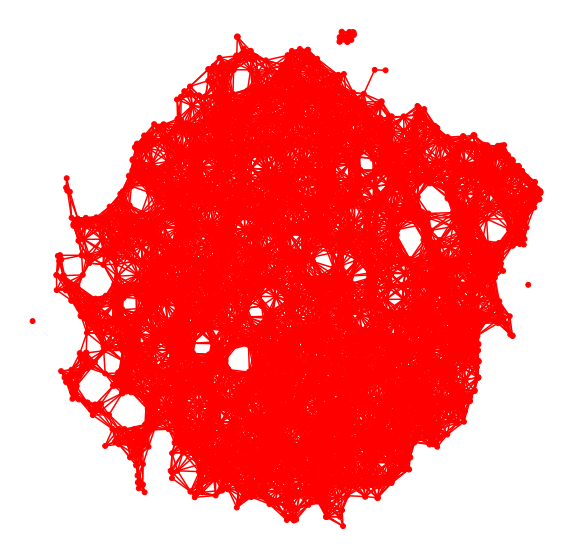

In [10]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=75, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 4900/4900 [00:01<00:00, 4176.77it/s]


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2122 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 21844 edges.
Finish TDA mapping

Graph
Contains 2122 nodes and 2550 samples
During constructing graph, 505 (83.47%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 70
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




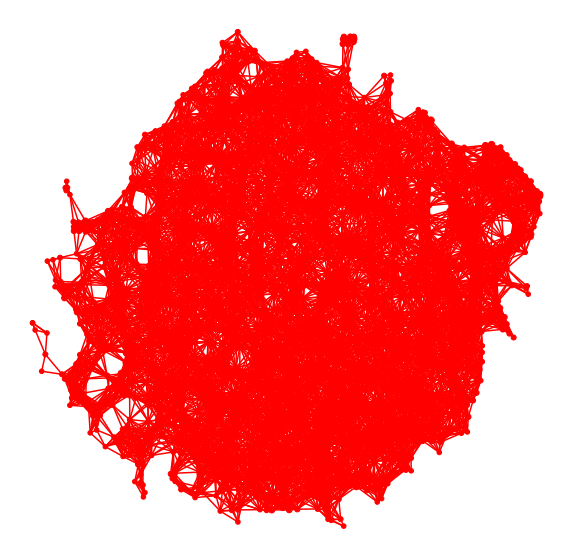

In [11]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=70, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 4225/4225 [00:01<00:00, 3872.03it/s]


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 1924 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 20187 edges.
Finish TDA mapping

Graph
Contains 1924 nodes and 2575 samples
During constructing graph, 480 (84.28999999999999%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 65
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




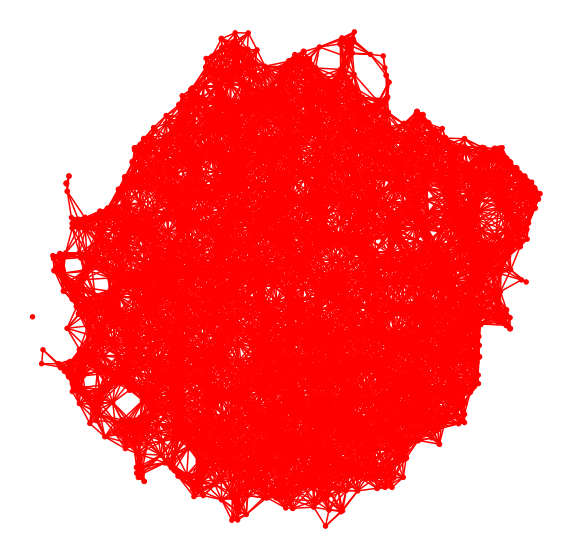

In [12]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=65, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 8100/8100 [00:01<00:00, 6039.85it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2486 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 21428 edges.
Finish TDA mapping

Graph
Contains 2486 nodes and 2412 samples
During constructing graph, 643 (78.95%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 90
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




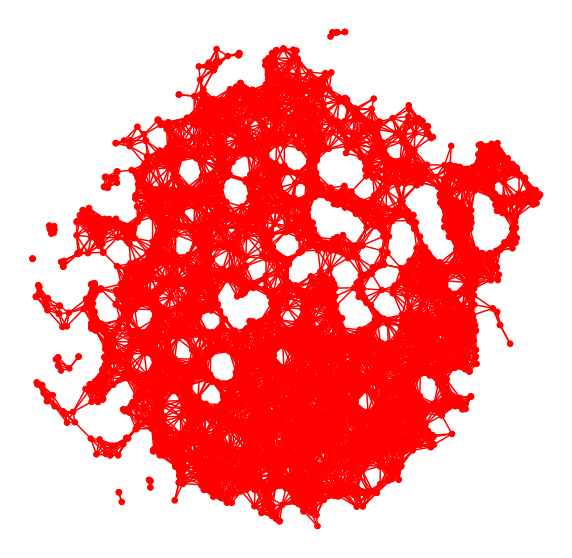

In [13]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=90, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 8100/8100 [00:01<00:00, 7262.41it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2110 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 15866 edges.
Finish TDA mapping

Graph
Contains 2110 nodes and 2323 samples
During constructing graph, 732 (76.03999999999999%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 90
overlap: 0.9
lens params
lens_0:
components: [0, 1]
metric: precomputed




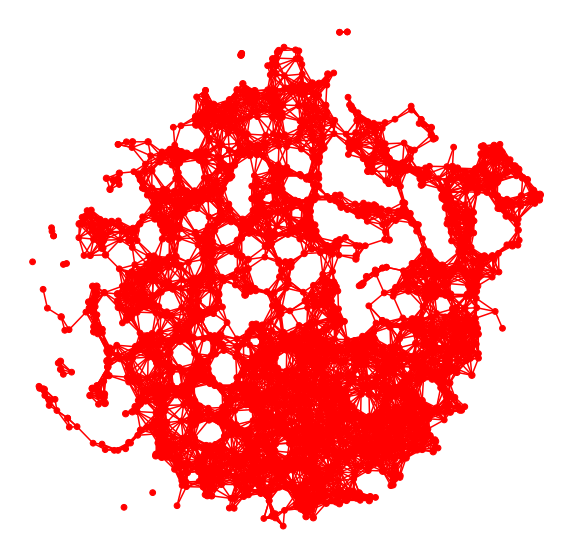

In [14]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=90, overlap=0.9)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 10000/10000 [00:01<00:00, 8385.13it/s]


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2286 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 17059 edges.
Finish TDA mapping

Graph
Contains 2286 nodes and 2292 samples
During constructing graph, 763 (75.02%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 100
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




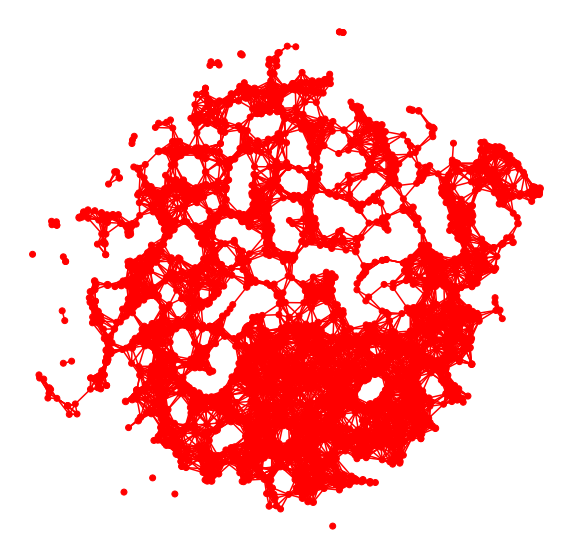

In [15]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=100, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 9025/9025 [00:01<00:00, 6822.78it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 5
...create 2439 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 19894 edges.
Finish TDA mapping

Graph
Contains 2439 nodes and 2355 samples
During constructing graph, 700 (77.09%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 5
n_jobs: None
p: None
cover params
r: 95
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




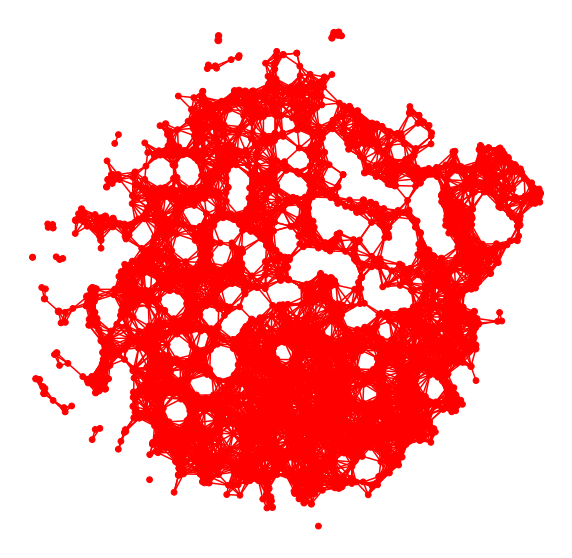

In [16]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=95, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

In [17]:
"""TDA ANALYSIS"""

# Converting vector-form distance to square-form distance matrix
dm = squareform(pdist(X,metric='braycurtis')) 

# Step 1: Initiate the Mapper algorithm
tm = mapper.Mapper(verbose=1)

# Step 2: Projection into low dimensional space
metric = Metric(metric="precomputed")
lens = [Filter.MDS(components=[0, 1], metric=metric, random_state=100)]
projected_X = tm.filter(dm, lens=lens)

# Step 3: Covering, clustering & mapping
eps = optimize_dbscan_eps(X, threshold=95)
clusterer = DBSCAN(eps=eps, min_samples=7)

Filtering by MDS.
...calculate Filter(which used to create cover) using the provided precomputed lens.
Filtering has been completed.


100%|██████████| 10000/10000 [00:00<00:00, 16171.97it/s]


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 7
...create 899 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 5066 edges.
Finish TDA mapping

Graph
Contains 899 nodes and 1678 samples
During constructing graph, 1377 (54.93%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 7
n_jobs: None
p: None
cover params
r: 100
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




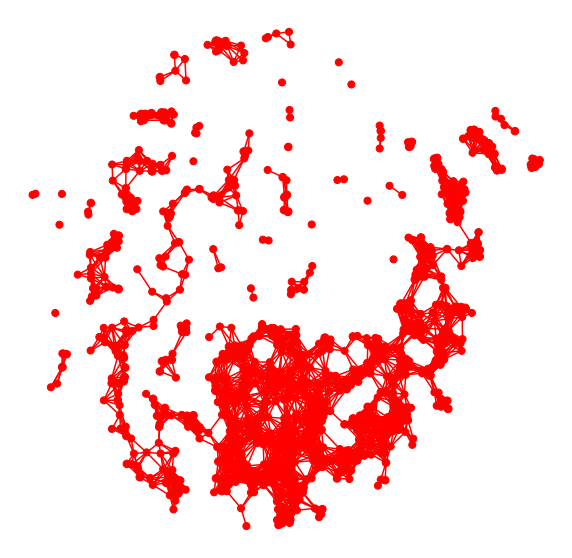

In [18]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=100, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 4900/4900 [00:01<00:00, 4591.36it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 7
...create 1778 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 17733 edges.
Finish TDA mapping

Graph
Contains 1778 nodes and 2453 samples
During constructing graph, 602 (80.28999999999999%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 7
n_jobs: None
p: None
cover params
r: 70
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




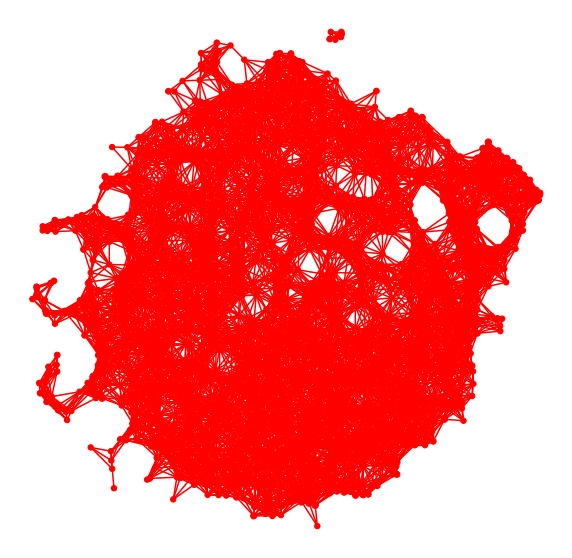

In [19]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=70, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 6400/6400 [00:00<00:00, 10556.93it/s]


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 7
...create 928 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 5560 edges.
Finish TDA mapping

Graph
Contains 928 nodes and 1908 samples
During constructing graph, 1147 (62.45%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 7
n_jobs: None
p: None
cover params
r: 80
overlap: 0.8
lens params
lens_0:
components: [0, 1]
metric: precomputed




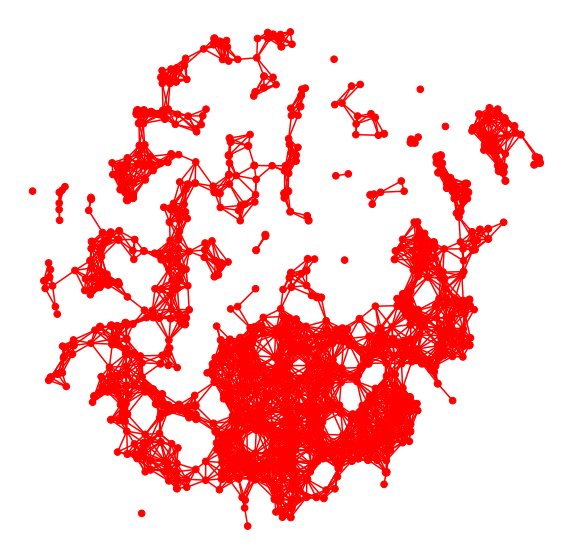

In [20]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=80, overlap=0.8)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 6400/6400 [00:01<00:00, 5806.03it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 7
...create 1685 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 14673 edges.
Finish TDA mapping

Graph
Contains 1685 nodes and 2277 samples
During constructing graph, 778 (74.53%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 7
n_jobs: None
p: None
cover params
r: 80
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




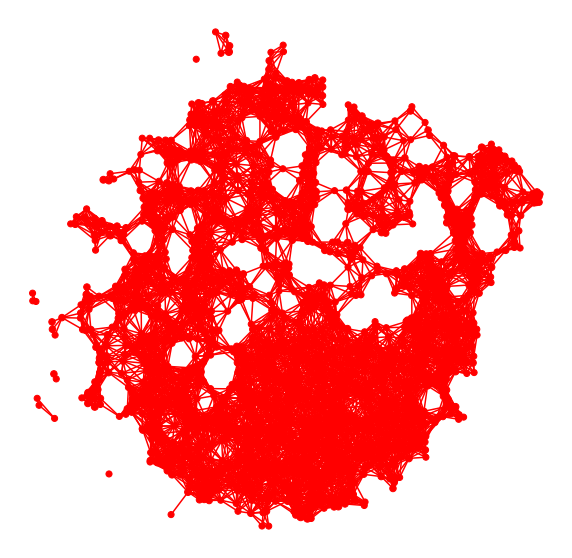

In [21]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=80, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 6400/6400 [00:01<00:00, 4518.14it/s] 


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 7
...create 2274 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 35127 edges.
Finish TDA mapping

Graph
Contains 2274 nodes and 2458 samples
During constructing graph, 597 (80.46%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 7
n_jobs: None
p: None
cover params
r: 80
overlap: 1.2
lens params
lens_0:
components: [0, 1]
metric: precomputed




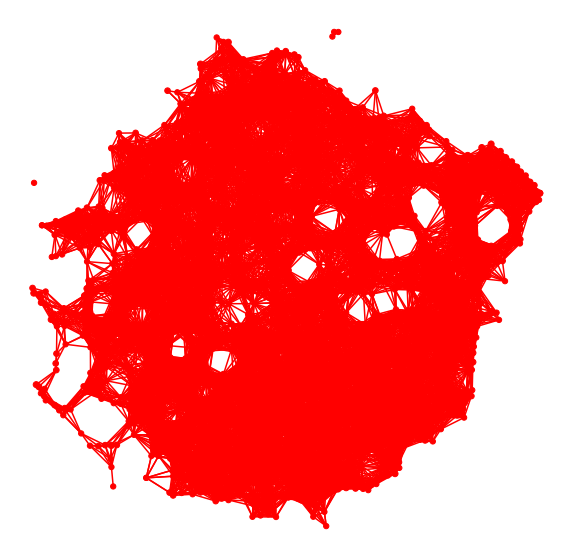

In [22]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=80, overlap=1.2)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 10000/10000 [00:01<00:00, 9016.76it/s]


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 7
...create 1808 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 20557 edges.
Finish TDA mapping

Graph
Contains 1808 nodes and 2096 samples
During constructing graph, 959 (68.61%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 7
n_jobs: None
p: None
cover params
r: 100
overlap: 1.2
lens params
lens_0:
components: [0, 1]
metric: precomputed




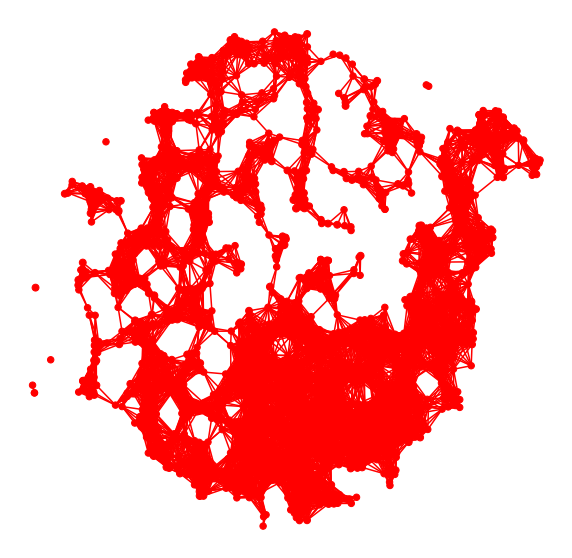

In [23]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=100, overlap=1.2)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 10000/10000 [00:00<00:00, 16078.53it/s]


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 7
...create 899 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 5066 edges.
Finish TDA mapping

Graph
Contains 899 nodes and 1678 samples
During constructing graph, 1377 (54.93%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 7
n_jobs: None
p: None
cover params
r: 100
overlap: 1
lens params
lens_0:
components: [0, 1]
metric: precomputed




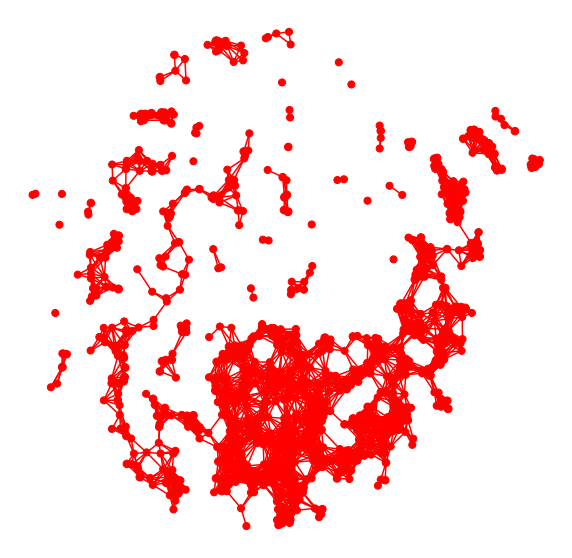

In [24]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=100, overlap=1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()

100%|██████████| 12100/12100 [00:00<00:00, 20686.26it/s]


Mapping on data (3055, 985) using lens (3055, 2)
...minimal number of points in hypercube to do clustering: 7
...create 843 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 5386 edges.
Finish TDA mapping

Graph
Contains 843 nodes and 1536 samples
During constructing graph, 1519 (50.28%) samples lost

Used params:

cluster params
algorithm: auto
eps: 21824674.75182847
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 7
n_jobs: None
p: None
cover params
r: 110
overlap: 1.1
lens params
lens_0:
components: [0, 1]
metric: precomputed




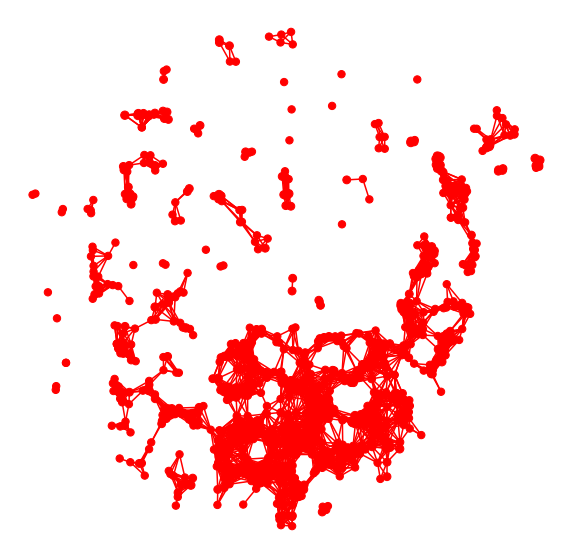

In [27]:
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=110, overlap=1.1)
graph = tm.map(data=X, cover=cover, clusterer=clusterer)
print(graph.info())
graph.show()